In [1]:
import pandas as pd
import numpy as np
import langid

In [2]:
df = pd.read_csv(r'junerussia.csv')



In [3]:
df.head()

,Screen_Name,Profile_Description,Tweet_text,Region
0,SamantaDarko,"[18+] Спасибо всем тем, кто понимает меня в ка...",Расцветай и забудь о прошлом.,Russia
1,161ru,"Главные новости Ростова, видеосюжеты, фоторепо...","👑 Ростовчанка Оксана Воеводина, обладательница...",Russia
2,161ru,"Главные новости Ростова, видеосюжеты, фоторепо...",🚔 Ростовского экс-полковника Дмитрия Захарченк...,Russia
3,161ru,"Главные новости Ростова, видеосюжеты, фоторепо...",ФК «Ростов» провел первую игру в турнире Кубок...,Russia
4,161ru,"Главные новости Ростова, видеосюжеты, фоторепо...",💰 Ростовстат опубликовал средние потребительск...,Russia


In [4]:
df.drop(['Profile_Description','Screen_Name'],inplace=True,axis=1)

In [5]:
df.head()

,Tweet_text,Region
0,Расцветай и забудь о прошлом.,Russia
1,"👑 Ростовчанка Оксана Воеводина, обладательница...",Russia
2,🚔 Ростовского экс-полковника Дмитрия Захарченк...,Russia
3,ФК «Ростов» провел первую игру в турнире Кубок...,Russia
4,💰 Ростовстат опубликовал средние потребительск...,Russia


In [7]:
df.shape

(16924, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16924 entries, 0 to 16923
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_text  16924 non-null  object
 1   Region      16924 non-null  object
dtypes: object(2)
memory usage: 264.6+ KB


In [9]:
print(df.isnull().sum())

Tweet_text    0
Region        0
dtype: int64


In [10]:
df['Tweet_text'] = df['Tweet_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) 

In [11]:
jun_ru_langid = df['Tweet_text'].apply(langid.classify)
ju_ru_langs = jun_ru_langid.apply(lambda tuple: tuple[0])

In [12]:
# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(ju_ru_langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(ju_ru_langs=="ru")/len(ju_ru_langs))*100)

Number of tagged languages (estimated):
53
Percent of data in English (estimated):
71.84471756086032


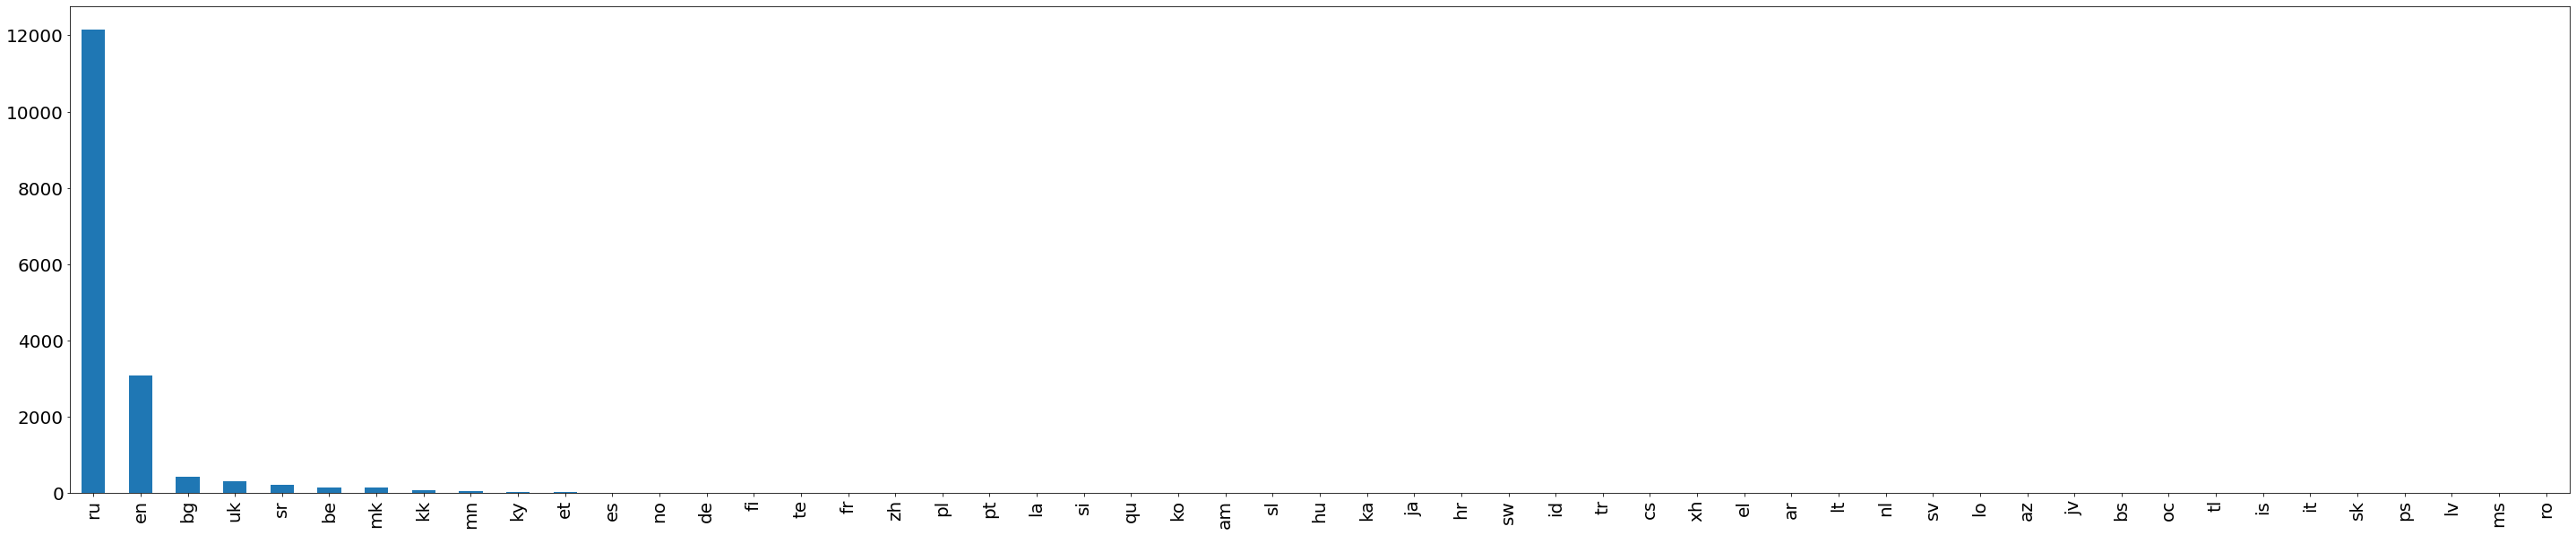

In [13]:
# convert our list of languages to a dataframe
jun_rulangs_df = pd.DataFrame(ju_ru_langs)

# count the number of times we see each language
jun_rulangs_count = jun_rulangs_df.Tweet_text.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
jun_rulangs_count.plot.bar(figsize=(50,10), fontsize=20)

In [14]:
no_of_junru = ju_ru_langs[ju_ru_langs == 'ru']

In [15]:
print(no_of_junru.index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16912, 16913, 16914, 16915, 16916, 16917, 16918, 16919, 16920,
            16922],
           dtype='int64', length=12159)


In [16]:
from collections import Counter
print(Counter(ju_ru_langs.values))

Counter({'ru': 12159, 'en': 3092, 'bg': 443, 'uk': 313, 'sr': 217, 'be': 147, 'mk': 145, 'kk': 91, 'mn': 55, 'ky': 41, 'et': 24, 'es': 16, 'fi': 15, 'de': 15, 'no': 15, 'te': 10, 'fr': 10, 'zh': 9, 'pt': 8, 'pl': 8, 'la': 7, 'si': 6, 'ko': 6, 'qu': 6, 'sl': 5, 'am': 5, 'id': 4, 'tr': 4, 'sw': 4, 'hr': 4, 'ka': 4, 'hu': 4, 'ja': 4, 'cs': 3, 'nl': 2, 'sv': 2, 'lt': 2, 'ar': 2, 'el': 2, 'xh': 2, 'lv': 1, 'oc': 1, 'sk': 1, 'az': 1, 'tl': 1, 'is': 1, 'jv': 1, 'ro': 1, 'ps': 1, 'it': 1, 'ms': 1, 'lo': 1, 'bs': 1})


In [287]:
j =Counter(ju_ru_langs.values) 

In [288]:
dict(sorted(j.items(), key=lambda item: item[1], reverse=True,)).keys()

dict_keys(['ru', 'en', 'bg', 'uk', 'sr', 'be', 'mk', 'kk', 'mn', 'ky', 'et', 'es', 'fi', 'de', 'no', 'te', 'fr', 'zh', 'pt', 'pl', 'la', 'si', 'ko', 'qu', 'sl', 'am', 'id', 'tr', 'sw', 'hr', 'ka', 'hu', 'ja', 'cs', 'nl', 'sv', 'lt', 'ar', 'el', 'xh', 'lv', 'oc', 'sk', 'az', 'tl', 'is', 'jv', 'ro', 'ps', 'it', 'ms', 'lo', 'bs'])

In [290]:
dict(sorted(j.items(), key=lambda item: item[1], reverse=True,)).values()

dict_values([12159, 3092, 443, 313, 217, 147, 145, 91, 55, 41, 24, 16, 15, 15, 15, 10, 10, 9, 8, 8, 7, 6, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [291]:
import matplotlib.pyplot as plt

new_data2 = {'tweets':[12159, 3092, 443, 313, 217, 147, 145, 91, 55, 41, 24, 16, 15, 15, 15, 10, 10],
           'Languages':['ru', 'en', 'bg', 'uk', 'sr', 'be', 'mk', 'kk', 'mn', 'ky', 'et', 'es', 'fi', 'de', 'no', 'te', 'fr']
}

viz_df2 = pd.DataFrame.from_dict(new_data2);viz_df2

,tweets,Languages
0,12159,ru
1,3092,en
2,443,bg
3,313,uk
4,217,sr
5,147,be
6,145,mk
7,91,kk
8,55,mn
9,41,ky


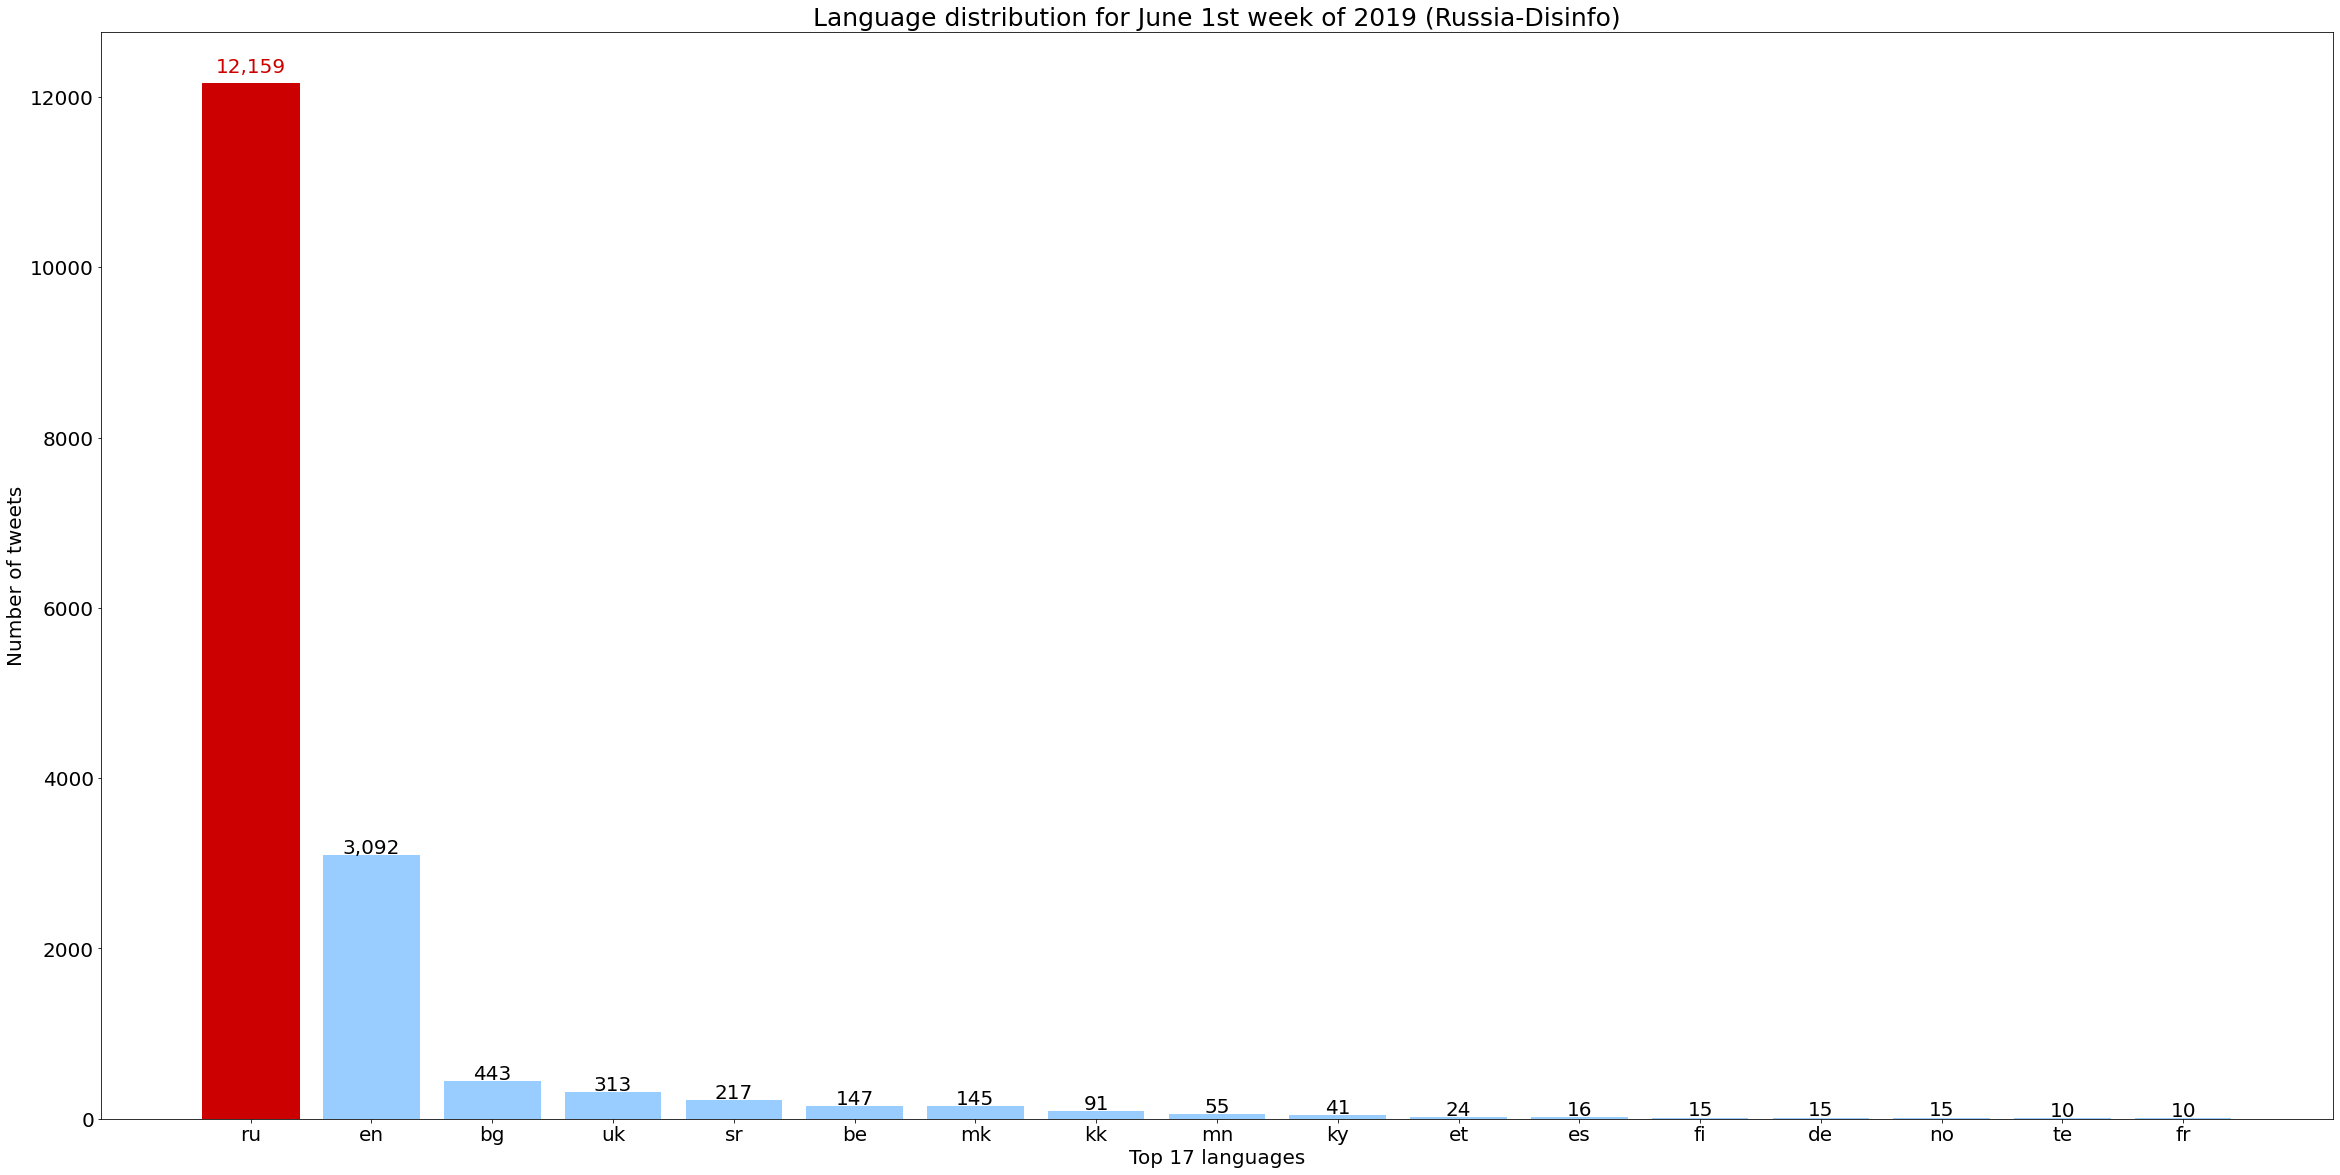

In [307]:
fig = plt.figure(figsize=(40,20))
ax1 = plt.subplot(111)
ret = ax1.bar(viz_df2['Languages'],viz_df2['tweets'],color='#99ccff')
ret[0].set_color('#CC0000')
for pX,pY in enumerate(viz_df2.tweets):
    if pX==0:
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+125), ha='center', color='#CC0000')
    else:    
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+20), ha='center')
plt.xlabel("Top 17 languages" , fontsize=20)
plt.ylabel("Number of tweets", fontsize=20)
plt.title("Language distribution for June 1st week of 2019 (Russia-Disinfo)",fontsize=25)
plt.savefig('ru-Russia-june.png')
plt.show()

In [36]:
june_ru_df = df.loc[no_of_junru.index]

In [37]:
june_ru_df.shape

(12159, 2)

In [17]:
df1 = pd.read_csv(r'juneothersrussia.csv')

In [18]:
df1.head()

,Screen_Name,Tweet_text,Region
0,setsuxxkooo,限界チーズ先輩おもろ。,Others
1,BuurautoNL,Mooi dat er een brede beweging op gang komt om...,Others
2,SUMMERTREE85,5対5面白すぎた😂\n明日休みならまだやりたかったんだが、くそ社畜なのでもう寝ます👾 htt...,Others
3,eruferuto_,wifegun,Others
4,koinshopee,@daffa_hndrwan Mesintai dia,Others


In [20]:
df1.drop(['Screen_Name'],inplace=True,axis=1)

In [21]:
df1.head()

,Tweet_text,Region
0,限界チーズ先輩おもろ。,Others
1,Mooi dat er een brede beweging op gang komt om...,Others
2,5対5面白すぎた😂\n明日休みならまだやりたかったんだが、くそ社畜なのでもう寝ます👾 htt...,Others
3,wifegun,Others
4,@daffa_hndrwan Mesintai dia,Others


In [22]:
df1.shape

(6999997, 2)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999997 entries, 0 to 6999996
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Tweet_text  object
 1   Region      object
dtypes: object(2)
memory usage: 106.8+ MB


In [24]:
print(df1.isnull().sum())

Tweet_text    3
Region        0
dtype: int64


In [26]:
df1 = df1.replace(np.nan, '')

In [27]:
print(df1.isnull().sum())

Tweet_text    0
Region        0
dtype: int64


In [28]:
df1['Tweet_text'] = df1['Tweet_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) 

In [29]:
jun_othersru_langid = df1['Tweet_text'].apply(langid.classify)
ju_othersru_langs = jun_othersru_langid.apply(lambda tuple: tuple[0])

In [31]:
# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(ju_othersru_langs.unique()))

# percent of the total dataset in English
print("Percent of data in Russian (estimated):")
print((sum(ju_othersru_langs=="ru")/len(ju_othersru_langs))*100)

Number of tagged languages (estimated):
97
Percent of data in Russian (estimated):
0.47100020185722935


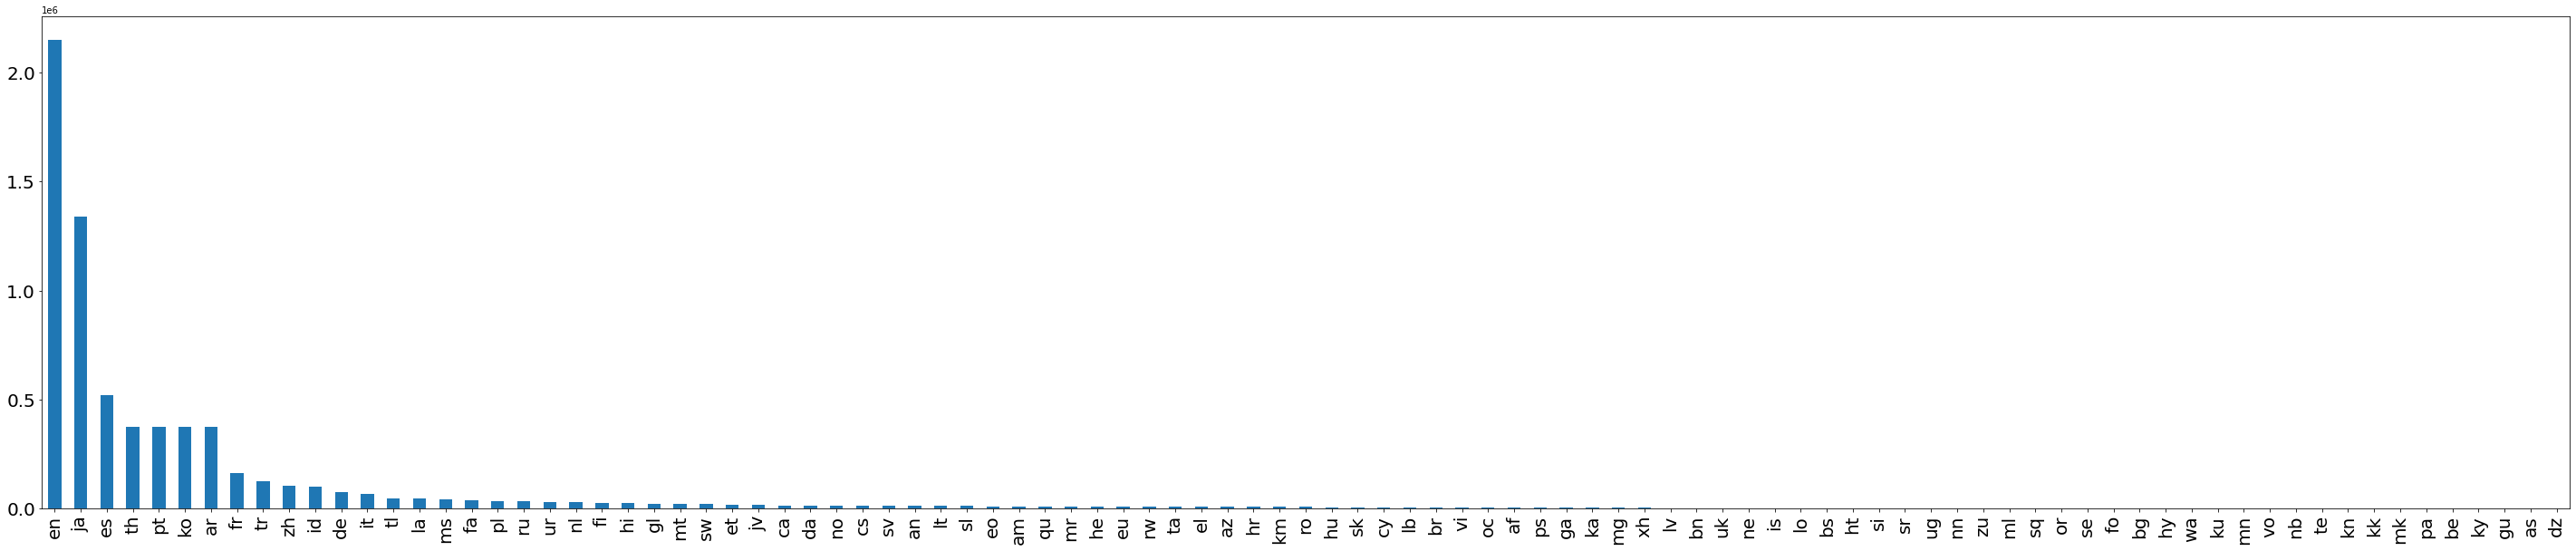

In [32]:
# convert our list of languages to a dataframe
jun_othersrulangs_df = pd.DataFrame(ju_othersru_langs)

# count the number of times we see each language
jun_othersrulangs_count = jun_othersrulangs_df.Tweet_text.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
jun_othersrulangs_count.plot.bar(figsize=(50,10), fontsize=20)

In [33]:
no_of_junothersru = ju_othersru_langs[ju_othersru_langs == 'ru']

In [34]:
print(no_of_junothersru.index)

Int64Index([     67,     384,     805,     838,     967,    1188,    1393,
               1663,    1785,    2169,
            ...
            6997923, 6998206, 6998310, 6998723, 6999220, 6999458, 6999716,
            6999767, 6999974, 6999988],
           dtype='int64', length=32970)


In [35]:
print(Counter(ju_othersru_langs.values))

Counter({'en': 2151393, 'ja': 1340312, 'es': 519914, 'th': 377660, 'pt': 377591, 'ko': 375785, 'ar': 375459, 'fr': 162731, 'tr': 127628, 'zh': 105505, 'id': 103575, 'de': 75679, 'it': 67133, 'tl': 47599, 'la': 47062, 'ms': 44260, 'fa': 38706, 'pl': 36184, 'ru': 32970, 'ur': 30704, 'nl': 29381, 'fi': 27057, 'hi': 26430, 'gl': 22587, 'mt': 21778, 'sw': 21311, 'et': 19391, 'jv': 18772, 'ca': 15979, 'da': 15154, 'no': 14718, 'cs': 13909, 'sv': 13408, 'an': 13144, 'lt': 12993, 'sl': 12933, 'eo': 11060, 'am': 11006, 'qu': 10787, 'mr': 10163, 'he': 10137, 'eu': 10134, 'rw': 9922, 'ta': 9759, 'el': 9723, 'az': 9444, 'hr': 9347, 'km': 9212, 'ro': 8417, 'hu': 7507, 'sk': 6541, 'cy': 6287, 'lb': 5984, 'br': 5910, 'vi': 5886, 'oc': 5811, 'af': 4783, 'ps': 4589, 'ga': 4451, 'ka': 4261, 'mg': 4059, 'xh': 4045, 'lv': 3796, 'bn': 3428, 'uk': 3403, 'ne': 3332, 'is': 2959, 'lo': 2899, 'bs': 2798, 'ht': 2679, 'si': 2638, 'sr': 2434, 'ug': 2352, 'nn': 2348, 'zu': 2312, 'ml': 2281, 'sq': 2147, 'or': 2106, 

In [276]:
k =Counter(ju_othersru_langs.values) 

In [277]:
dict(sorted(k.items(), key=lambda item: item[1], reverse=True,)).keys()

dict_keys(['en', 'ja', 'es', 'th', 'pt', 'ko', 'ar', 'fr', 'tr', 'zh', 'id', 'de', 'it', 'tl', 'la', 'ms', 'fa', 'pl', 'ru', 'ur', 'nl', 'fi', 'hi', 'gl', 'mt', 'sw', 'et', 'jv', 'ca', 'da', 'no', 'cs', 'sv', 'an', 'lt', 'sl', 'eo', 'am', 'qu', 'mr', 'he', 'eu', 'rw', 'ta', 'el', 'az', 'hr', 'km', 'ro', 'hu', 'sk', 'cy', 'lb', 'br', 'vi', 'oc', 'af', 'ps', 'ga', 'ka', 'mg', 'xh', 'lv', 'bn', 'uk', 'ne', 'is', 'lo', 'bs', 'ht', 'si', 'sr', 'ug', 'nn', 'zu', 'ml', 'sq', 'or', 'se', 'fo', 'bg', 'hy', 'wa', 'ku', 'mn', 'vo', 'nb', 'te', 'kn', 'kk', 'mk', 'pa', 'be', 'ky', 'gu', 'as', 'dz'])

In [278]:
dict(sorted(k.items(), key=lambda item: item[1], reverse=True,)).values()

dict_values([2151393, 1340312, 519914, 377660, 377591, 375785, 375459, 162731, 127628, 105505, 103575, 75679, 67133, 47599, 47062, 44260, 38706, 36184, 32970, 30704, 29381, 27057, 26430, 22587, 21778, 21311, 19391, 18772, 15979, 15154, 14718, 13909, 13408, 13144, 12993, 12933, 11060, 11006, 10787, 10163, 10137, 10134, 9922, 9759, 9723, 9444, 9347, 9212, 8417, 7507, 6541, 6287, 5984, 5910, 5886, 5811, 4783, 4589, 4451, 4261, 4059, 4045, 3796, 3428, 3403, 3332, 2959, 2899, 2798, 2679, 2638, 2434, 2352, 2348, 2312, 2281, 2147, 2106, 1906, 1780, 1644, 1617, 1593, 1437, 1236, 1170, 1107, 1069, 901, 897, 816, 744, 596, 514, 454, 326, 258])

In [279]:
import matplotlib.pyplot as plt

new_data1 = {'tweets':[2151393, 1340312, 519914, 377660, 377591, 375785, 375459, 162731, 127628, 105505, 103575, 75679, 67133, 47599, 47062, 44260, 38706, 36184, 32970],
           'Languages':['en', 'ja', 'es', 'th', 'pt', 'ko', 'ar', 'fr', 'tr', 'zh', 'id', 'de', 'it', 'tl', 'la', 'ms', 'fa', 'pl', 'ru']
}

viz_df1 = pd.DataFrame.from_dict(new_data1);viz_df1

,tweets,Languages
0,2151393,en
1,1340312,ja
2,519914,es
3,377660,th
4,377591,pt
5,375785,ko
6,375459,ar
7,162731,fr
8,127628,tr
9,105505,zh


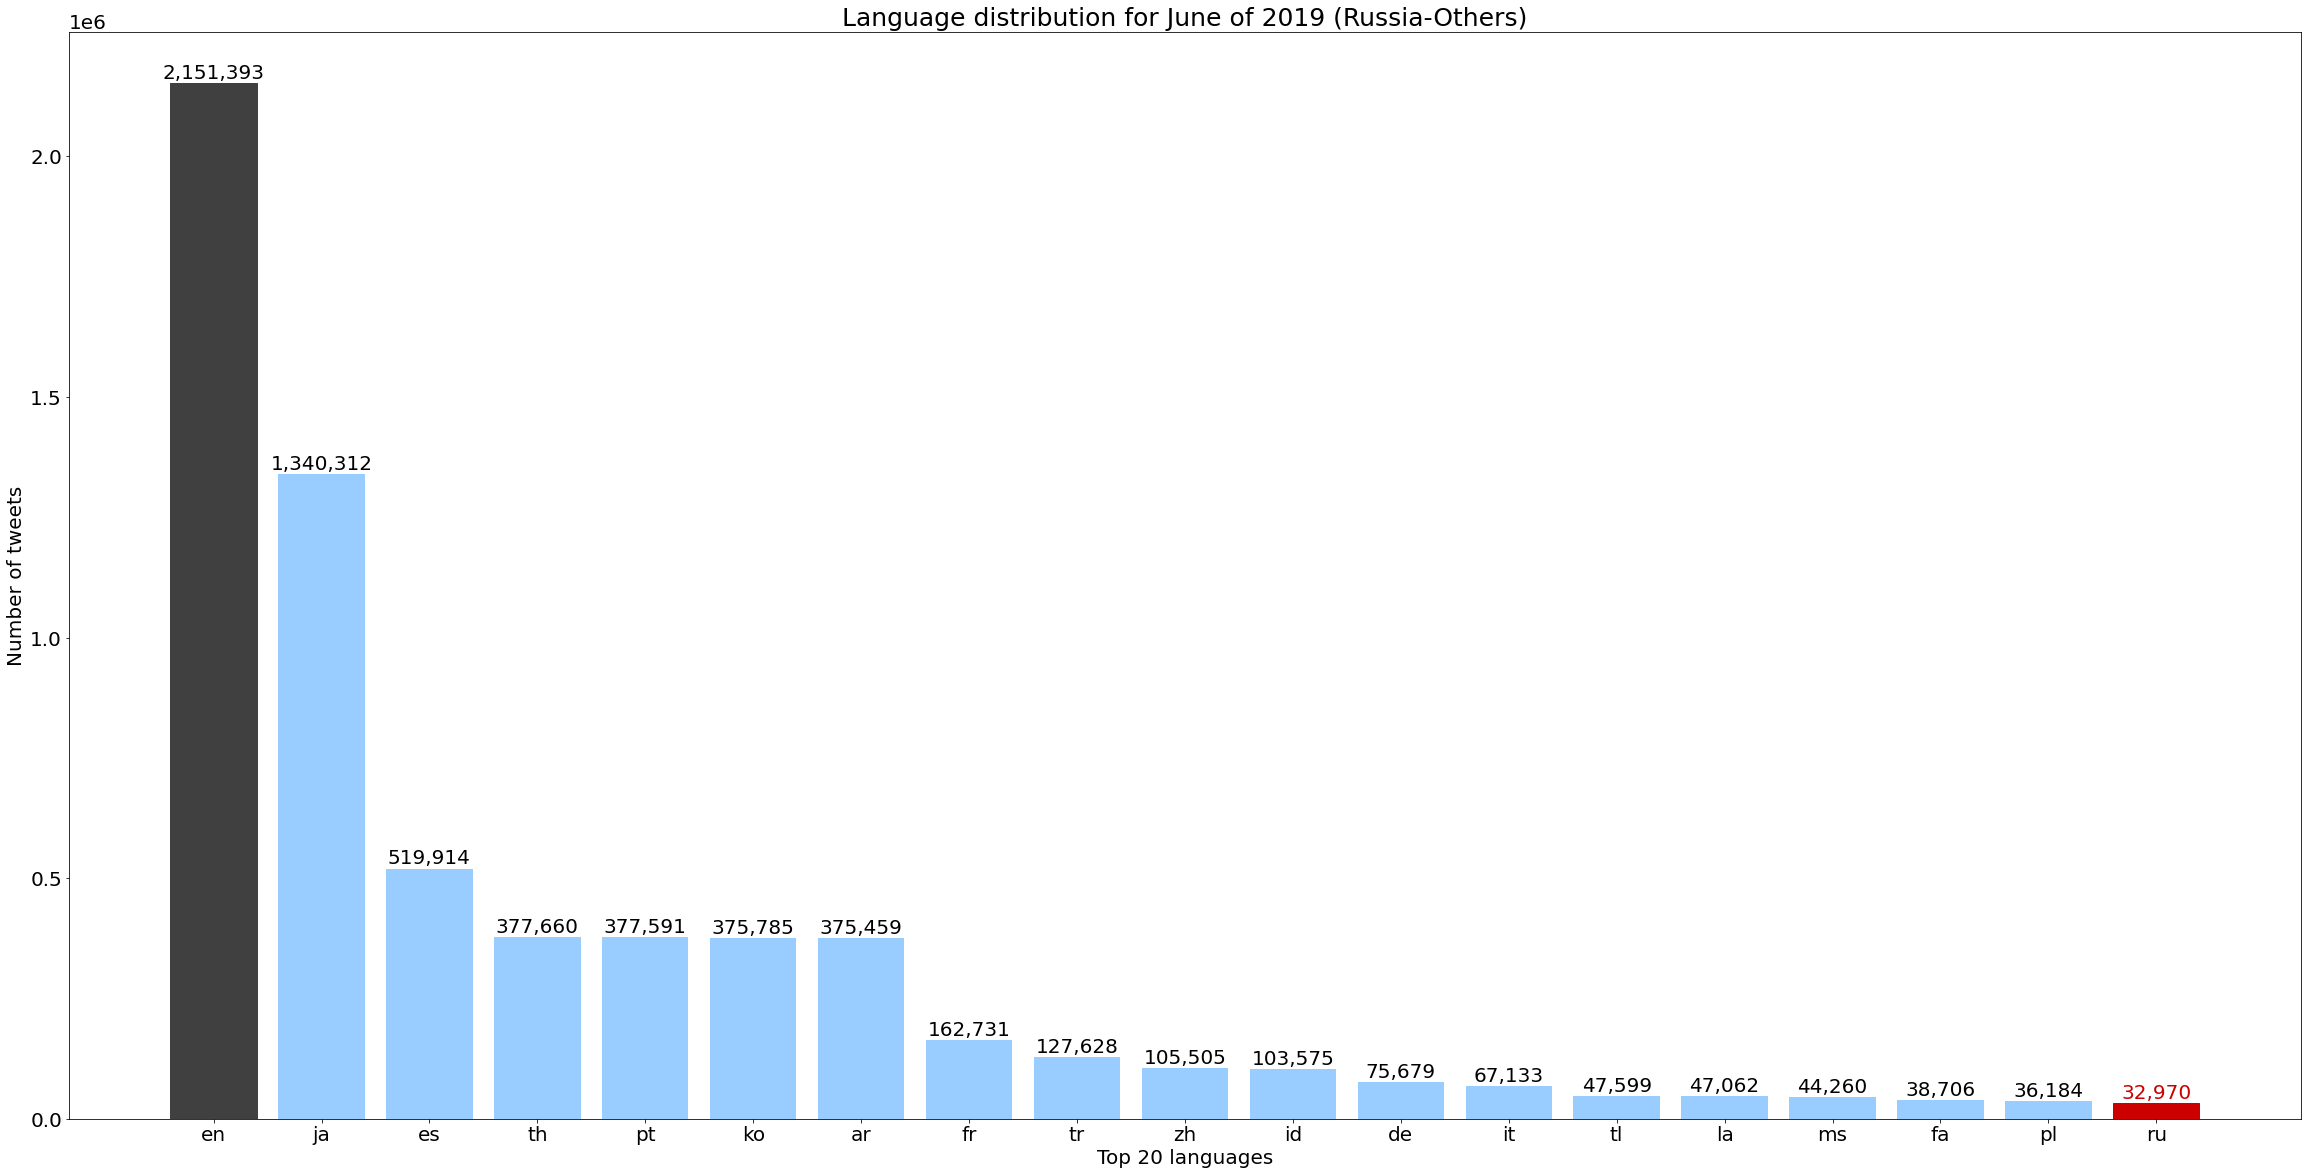

In [306]:
fig = plt.figure(figsize=(40,20))
ax1 = plt.subplot(111)
ret = ax1.bar(viz_df1['Languages'],viz_df1['tweets'],color='#99ccff')
ret[0].set_color('#404040')
ret[18].set_color('#CC0000')
for pX,pY in enumerate(viz_df1.tweets):
    if pX==18:
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+10000), ha='center', color='#CC0000')
    else:    
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+10000), ha='center')
plt.xlabel("Top 20 languages" , fontsize=20)
plt.ylabel("Number of tweets", fontsize=20)
plt.title("Language distribution for June of 2019 (Russia-Others)",fontsize=25)
plt.savefig('ru-others-june.png')
plt.show()

In [38]:
june_Othersrudf = df1.loc[no_of_junothersru.index]

In [39]:
june_Othersrudf.shape

(32970, 2)

In [40]:
june_Othersrudf.head()

,Tweet_text,Region
67,...ㅎ,Others
384,RT @yankeesumsh: Хотели розыгрыш? Получайте ! ...,Others
805,AutoCash - заработок от 4000 руб в сутки [Паке...,Others
838,"нет такого чувства, как «я тебя тоже»",Others
967,RT @_Fashington: Когда у меня просят пруф!,Others


In [41]:
june_Othersrudf = june_Othersrudf.sample(n=len(june_ru_df))

In [42]:
df_russia = june_ru_df.append([june_Othersrudf])

In [43]:
df_russia.shape

(24318, 2)

In [44]:
df_russia = df_russia.sample(frac=1, random_state = 24).reset_index(drop=True)

In [45]:
df_russia.head()

,Tweet_text,Region
0,Кремль прокомментировал дело журналиста Голуно...,Russia
1,«Появление женщины в такое время и то на прямо...,Russia
2,Наши люди в смузичную на гироскутерах не ездят!,Russia
3,"RT @vzglyad: То, что сделала Соболь с Симоньян...",Russia
4,"@WERA1OMSK Агаа, я помню. Я в Боровом был в 20...",Russia


In [46]:
df_russia.to_csv('junerussia.csv',index=False,header=True)

In [47]:
df2 = pd.read_csv(r'julyothersrussia.csv')

In [48]:
df2.head()

,Screen_Name,Tweet_text,Region
0,syuuta17,RT @rikudes2076: @TanestarP ←理想 理想→,Others
1,tsuchaman,遠距離恋愛で 物理的な距離感に耐えられなくなるのが男性 心理的な距離感に耐えられなくなるのが...,Others
2,isalittlegirl_,RT @Nataaan93: i feel like i owe my parents so...,Others
3,kanon_tiny,RT @hatyunemisi: d！ラクガキ詰め!!!!!!!!!!!!!!!!\nみんな...,Others
4,mmalloorryy,RT @Absvrde: @abbygov 🤔 https://t.co/p8JvUq1gTB,Others


In [49]:
df2.drop(['Screen_Name'],inplace=True,axis=1)

In [50]:
df2.shape

(24352571, 2)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24352571 entries, 0 to 24352570
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Tweet_text  object
 1   Region      object
dtypes: object(2)
memory usage: 371.6+ MB


In [52]:
print(df2.isnull().sum())

Tweet_text    22
Region         0
dtype: int64


In [ ]:
df2 = df2.replace(np.nan, '')

In [55]:
df2 = df2.dropna(axis = 0, how ='any')

In [56]:
print(df2.isnull().sum())

Tweet_text    0
Region        0
dtype: int64


In [57]:
df2['Tweet_text'] = df2['Tweet_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) 

In [58]:
july_othersru_langid = df2['Tweet_text'].apply(langid.classify)
july_othersru_langs = july_othersru_langid.apply(lambda tuple: tuple[0])

In [59]:
# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(july_othersru_langs.unique()))

# percent of the total dataset in English
print("Percent of data in Russian (estimated):")
print((sum(july_othersru_langs=="ru")/len(july_othersru_langs))*100)

Number of tagged languages (estimated):
97
Percent of data in Russian (estimated):
0.46983172069584994


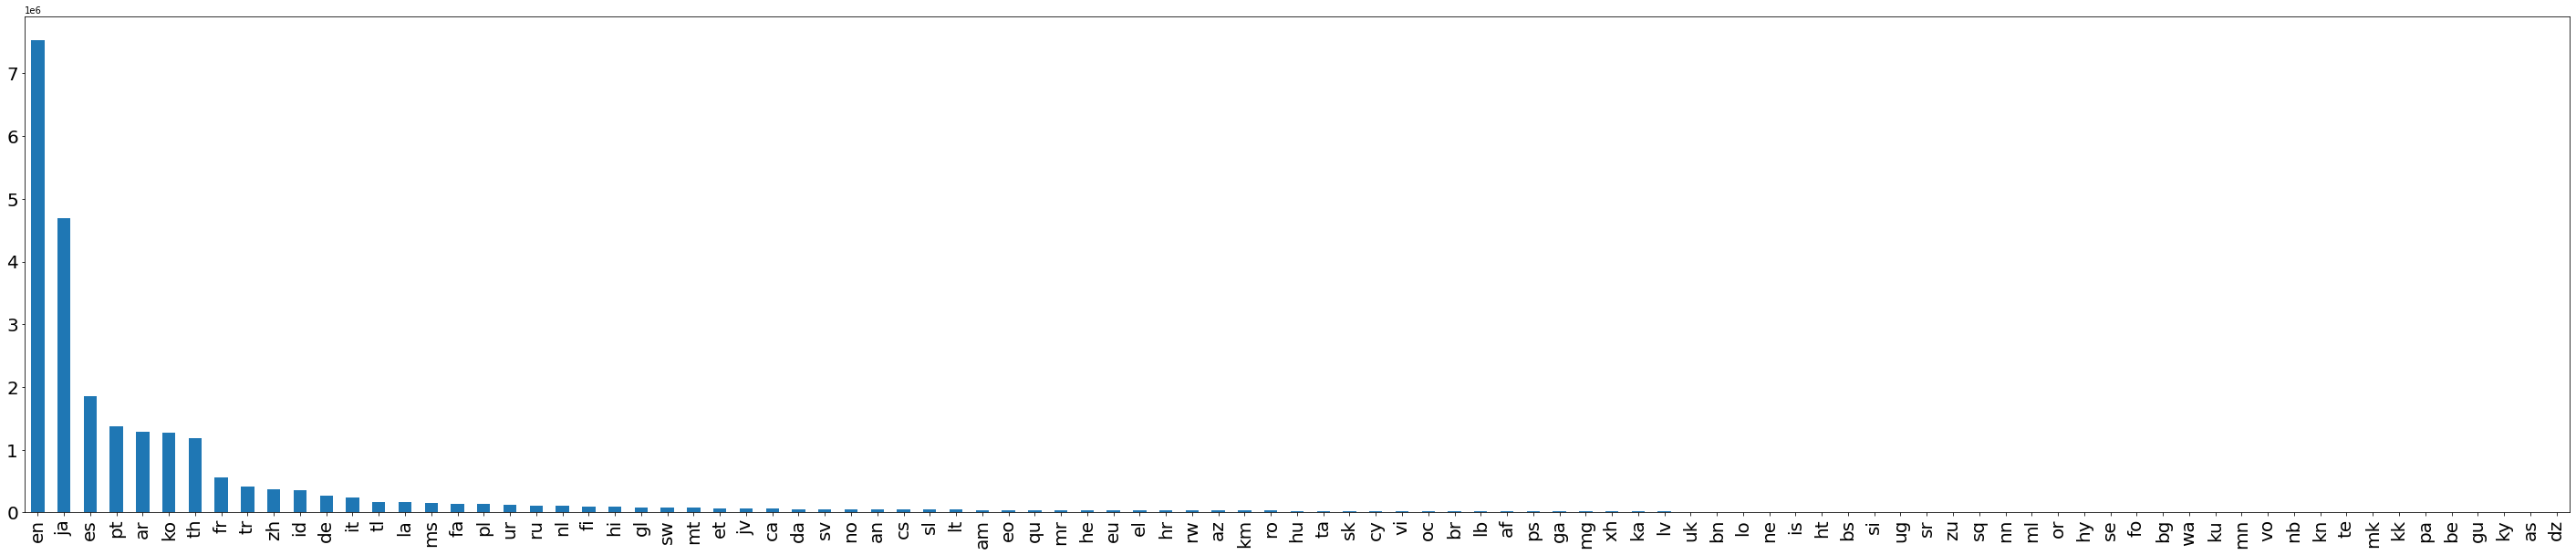

In [60]:
# convert our list of languages to a dataframe
july_othersrulangs_df = pd.DataFrame(july_othersru_langs)

# count the number of times we see each language
july_othersrulangs_count = july_othersrulangs_df.Tweet_text.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
july_othersrulangs_count.plot.bar(figsize=(50,10), fontsize=20)

In [61]:
no_of_julyothersru = july_othersru_langs[july_othersru_langs == 'ru']

In [62]:
print(no_of_julyothersru.index)

Int64Index([      18,      140,      251,      382,      966,     1135,
                1141,     1158,     1429,     1782,
            ...
            24351050, 24351433, 24351561, 24351619, 24351731, 24352026,
            24352186, 24352378, 24352543, 24352553],
           dtype='int64', length=114416)


In [122]:
print(Counter(july_othersru_langs.values))

Counter({'en': 7534574, 'ja': 4689165, 'es': 1850811, 'pt': 1373605, 'ar': 1285630, 'ko': 1278154, 'th': 1179987, 'fr': 565053, 'tr': 411701, 'zh': 371321, 'id': 356589, 'de': 261661, 'it': 240625, 'tl': 171414, 'la': 168464, 'ms': 147381, 'fa': 136507, 'pl': 129991, 'ur': 118678, 'ru': 114416, 'nl': 101665, 'fi': 92625, 'hi': 90063, 'gl': 83653, 'sw': 75545, 'mt': 73253, 'et': 69442, 'jv': 65056, 'ca': 58151, 'da': 53769, 'sv': 51317, 'no': 50438, 'an': 48413, 'cs': 47166, 'sl': 45355, 'lt': 44335, 'am': 39375, 'eo': 39269, 'qu': 38273, 'mr': 35807, 'he': 35485, 'eu': 34908, 'el': 34616, 'hr': 32989, 'rw': 32279, 'az': 31282, 'km': 31232, 'ro': 29430, 'hu': 27238, 'ta': 25363, 'sk': 22994, 'cy': 22649, 'vi': 22630, 'oc': 21203, 'br': 20615, 'lb': 20094, 'af': 16172, 'ps': 16128, 'ga': 16074, 'mg': 15573, 'xh': 14331, 'ka': 14117, 'lv': 13470, 'uk': 12327, 'bn': 11922, 'lo': 11747, 'ne': 11311, 'is': 10108, 'ht': 10049, 'bs': 9905, 'si': 9185, 'ug': 8559, 'sr': 8525, 'zu': 8157, 'sq': 

In [148]:
d = Counter(july_othersru_langs.values)

In [161]:
dict(sorted(d.items(), key=lambda item: item[1], reverse=True,)).keys()

dict_keys(['en', 'ja', 'es', 'pt', 'ar', 'ko', 'th', 'fr', 'tr', 'zh', 'id', 'de', 'it', 'tl', 'la', 'ms', 'fa', 'pl', 'ur', 'ru', 'nl', 'fi', 'hi', 'gl', 'sw', 'mt', 'et', 'jv', 'ca', 'da', 'sv', 'no', 'an', 'cs', 'sl', 'lt', 'am', 'eo', 'qu', 'mr', 'he', 'eu', 'el', 'hr', 'rw', 'az', 'km', 'ro', 'hu', 'ta', 'sk', 'cy', 'vi', 'oc', 'br', 'lb', 'af', 'ps', 'ga', 'mg', 'xh', 'ka', 'lv', 'uk', 'bn', 'lo', 'ne', 'is', 'ht', 'bs', 'si', 'ug', 'sr', 'zu', 'sq', 'nn', 'ml', 'or', 'hy', 'se', 'fo', 'bg', 'wa', 'ku', 'mn', 'vo', 'nb', 'kn', 'te', 'mk', 'kk', 'pa', 'be', 'gu', 'ky', 'as', 'dz'])

In [163]:
dict(sorted(d.items(), key=lambda item: item[1], reverse=True,)).values()

dict_values([7534574, 4689165, 1850811, 1373605, 1285630, 1278154, 1179987, 565053, 411701, 371321, 356589, 261661, 240625, 171414, 168464, 147381, 136507, 129991, 118678, 114416, 101665, 92625, 90063, 83653, 75545, 73253, 69442, 65056, 58151, 53769, 51317, 50438, 48413, 47166, 45355, 44335, 39375, 39269, 38273, 35807, 35485, 34908, 34616, 32989, 32279, 31282, 31232, 29430, 27238, 25363, 22994, 22649, 22630, 21203, 20615, 20094, 16172, 16128, 16074, 15573, 14331, 14117, 13470, 12327, 11922, 11747, 11311, 10108, 10049, 9905, 9185, 8559, 8525, 8157, 8058, 7551, 7058, 7002, 6850, 6806, 6082, 5953, 5282, 4986, 4339, 4138, 3973, 3331, 3330, 2992, 2973, 2573, 2094, 1799, 1696, 1307, 1012])

In [165]:
import matplotlib.pyplot as plt

new_data = {'tweets':[7534574,4689165,1850811,1373605,1285630,1278154,1179987,565053,411701,371321,356589,261661,240625,171414,168464,147381,136507,129991,118678,114416],
           'Languages':['en', 'ja', 'es', 'pt', 'ar', 'ko', 'th', 'fr', 'tr', 'zh', 'id', 'de', 'it', 'tl', 'la', 'ms', 'fa', 'pl', 'ur', 'ru']
}

viz_df = pd.DataFrame.from_dict(new_data);viz_df

,tweets,Languages
0,7534574,en
1,4689165,ja
2,1850811,es
3,1373605,pt
4,1285630,ar
5,1278154,ko
6,1179987,th
7,565053,fr
8,411701,tr
9,371321,zh


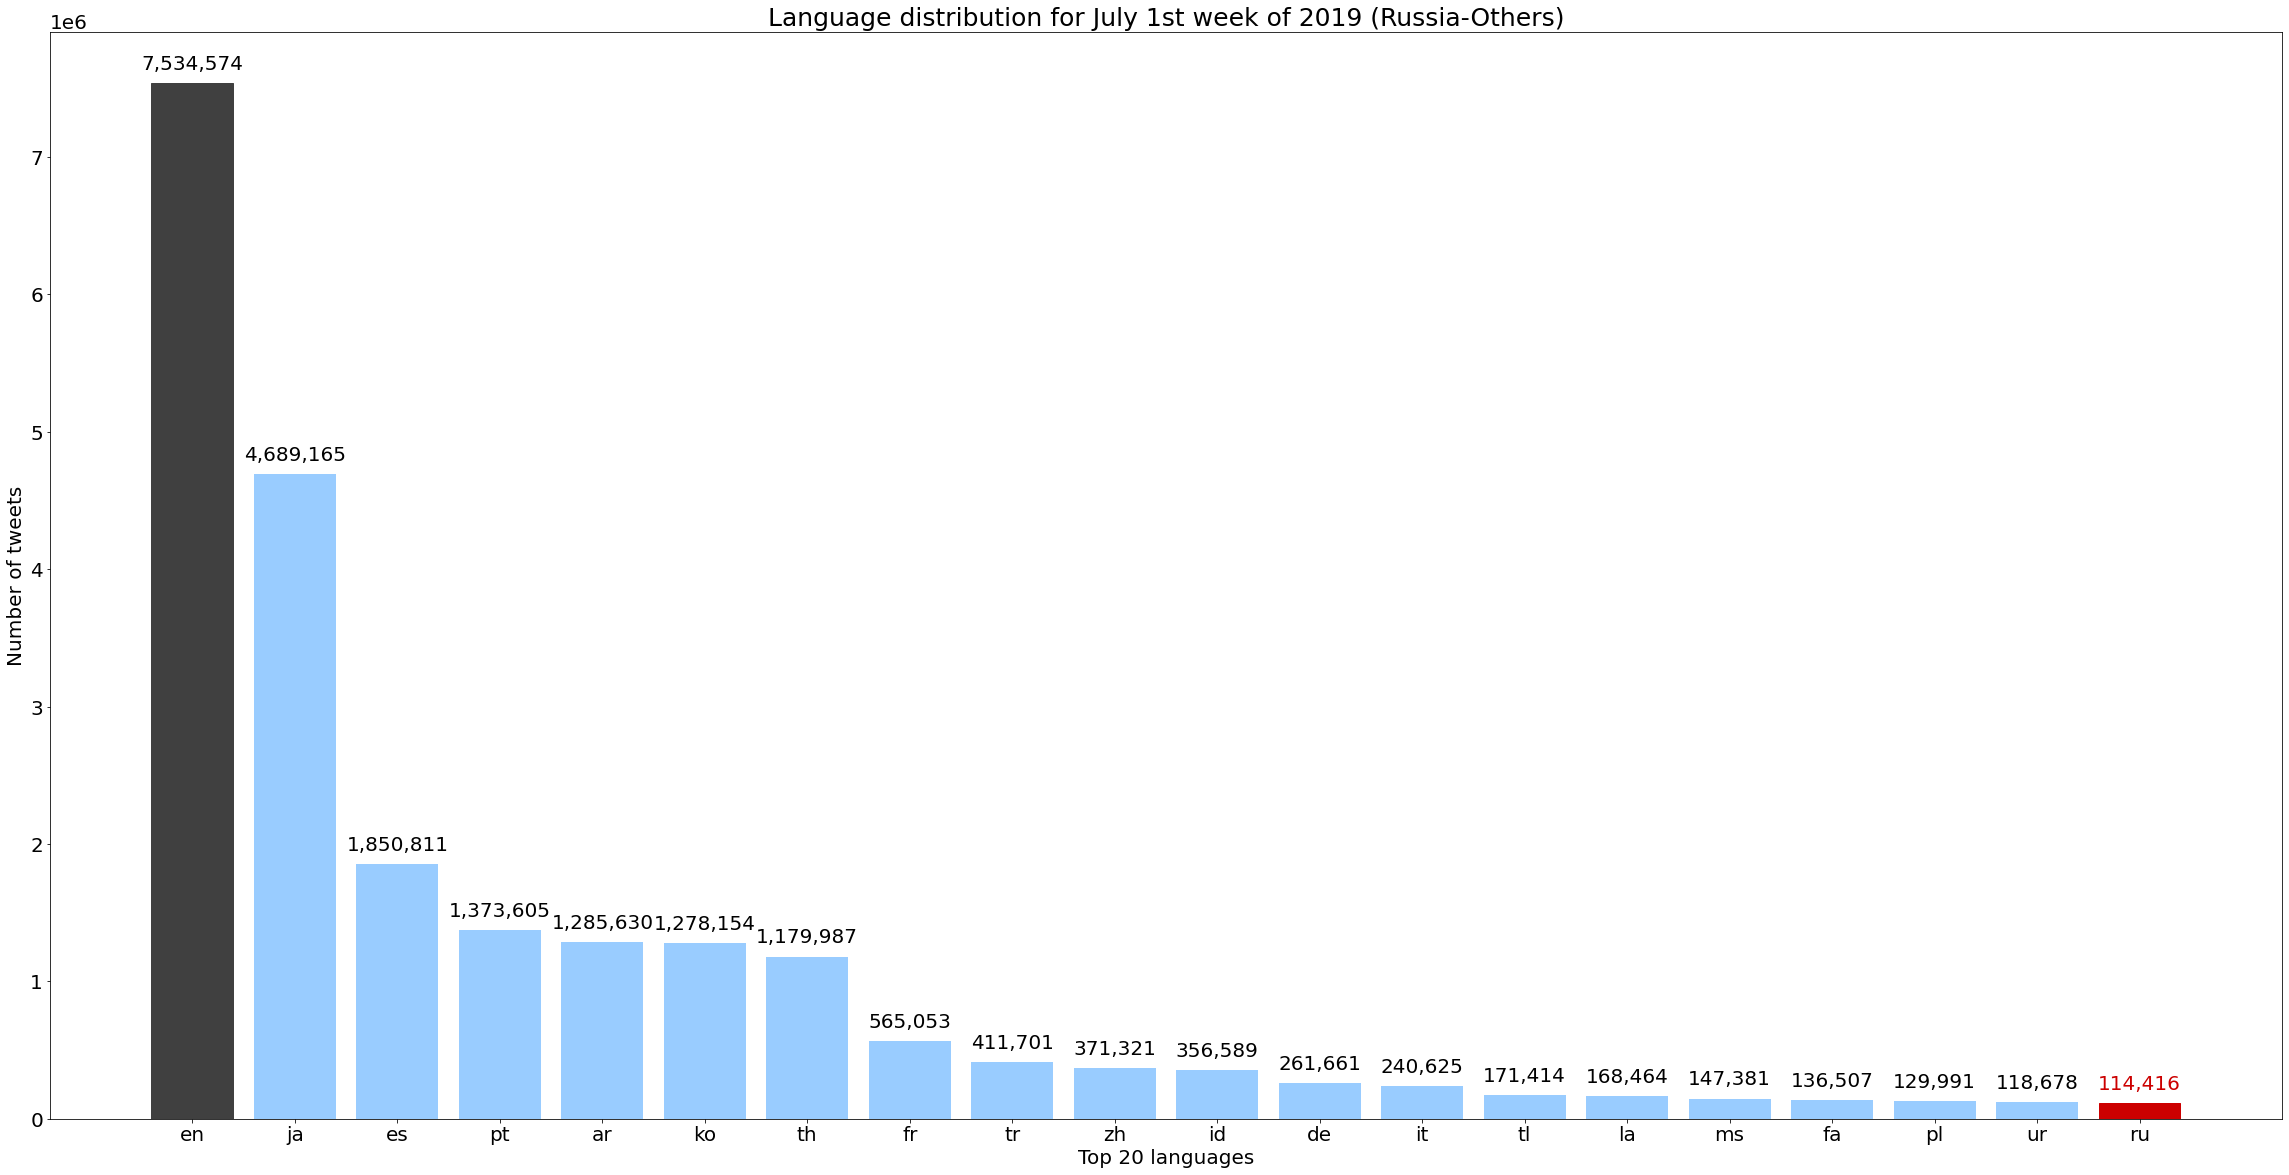

In [305]:
fig = plt.figure(figsize=(40,20))
ax1 = plt.subplot(111)
ret = ax1.bar(viz_df['Languages'],viz_df['tweets'],color='#99ccff')
ret[0].set_color('#404040')
ret[19].set_color('#CC0000')
for pX,pY in enumerate(viz_df.tweets):
    if pX==19:
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+100000), ha='center', color='#CC0000')
    else:    
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+100000), ha='center')
plt.xlabel("Top 20 languages" , fontsize=20)
plt.ylabel("Number of tweets", fontsize=20)
plt.title("Language distribution for July 1st week of 2019 (Russia-Others)",fontsize=25)
plt.savefig('ru-others-july.png')
plt.show()

In [194]:
for pX,pY in enumerate(viz_df.tweets):
    print(pX,pY)

0 7534574
1 4689165
2 1850811
3 1373605
4 1285630
5 1278154
6 1179987
7 565053
8 411701
9 371321
10 356589
11 261661
12 240625
13 171414
14 168464
15 147381
16 136507
17 129991
18 118678
19 114416


In [65]:
july_Othersrudf = df2.loc[no_of_julyothersru.index]

In [66]:
july_Othersrudf.shape

(114416, 2)

In [67]:
july_Othersrudf.head()

,Tweet_text,Region
18,"RT @drsy10WSbjZ3Sho: НУ ЧЁ ПАЦАНЫ, НОВОСТИ С К...",Others
140,@fuckterprise ой блин я забыла что обещала теб...,Others
251,"Как правильно спать, что такое первичные грави...",Others
382,RT @bonbon_gi: доброе утро только русскоговоря...,Others
966,"Блять мне даже понравилась эта писанина,удивит...",Others


In [68]:
july_Othersrudf.to_csv('Testing_July_Others_Russia.csv')

In [111]:
l1=[]
for row in july_Othersrudf.index: 
    l1.append(row)

In [70]:
df3 = pd.read_csv(r'julyothersrussia.csv')

In [118]:
df3.head(20)

,Screen_Name,Tweet_text,Region
0,syuuta17,RT @rikudes2076: @TanestarP ←理想 理想→,Others
1,tsuchaman,遠距離恋愛で 物理的な距離感に耐えられなくなるのが男性 心理的な距離感に耐えられなくなるのが...,Others
2,isalittlegirl_,RT @Nataaan93: i feel like i owe my parents so...,Others
3,kanon_tiny,RT @hatyunemisi: d！ラクガキ詰め!!!!!!!!!!!!!!!!\nみんな...,Others
4,mmalloorryy,RT @Absvrde: @abbygov 🤔 https://t.co/p8JvUq1gTB,Others
5,sue09161966,RT @Yodobashi_X: 【ヨドバシカメラ x LUMENA】\n\n大ヒットLED...,Others
6,AydielZaki,RT @sarcasm_box: dog https://t.co/fGYSdzK7fk,Others
7,___a_ya_N_xxx,@NANA56406110 まてる〜,Others
8,Gfriend_15bd_05,#여자친구_열대야로_여름을_열대야 \n시험 포기하고 열대야 들어야지~\n열대야 흥해...,Others
9,PIXY194,@beta_bera まぁ普通有り得ない(*´艸`*),Others


In [114]:
df4['Screen_Name']=df3['Screen_Name'].loc[l1]

In [115]:
df4.head()

,Screen_Name
18,mne_to_netb
140,jufdary
251,Indicator_ru
382,pizza_with_hone
966,Dasha_Savina21


In [116]:
df4.shape

(114416, 1)

In [117]:
df4.to_csv('columnattachment.csv')